In [37]:
       
def power_mod_p(x, y, p):
    # Function to calculate (x^y) % p 
    res = 1
    x = x % p  # make sure x is less than p
    while y > 0:
        # overall the approach is to do exponentiation by squaring
        # if y is odd then multiply x with result 
        if y & 1:
            res = (res * x) % p
        y = y >> 1
        x = (x * x) % p
    return res

1. Pick a random number $a < N$.

2. Check that $a$ is not a factor of $N$. We can find this by using Euclid's algorithm to compute the greatest common divisor (gcd) of $a$ and $N$. If $\text{gcd}(a, N) \neq 1$, then $a$ is a factor of $N$ because this means $N$ is not prime and $\text{gcd}(a, N)$ is a non-trivial factor of $N$. If $\text{gcd}(a, N) \neq 1$ then $a$ and $N$ are coprime.

2. If $a$ is not a factor of $N$, then we need to find $r$, the period of the function $f(x) = a^x \mod N$. This is the most complex step and where quantum computing comes into play. The function $f(x)$ is periodic, and we want to find the smallest non-zero $r$ such that $f(x + r) = f(x)$.

3. If $r$ is odd, or if $a^{r/2} \equiv -1 \mod N$, then we return to step 1. This is because $r$ needs to be even for the next steps to work, and $a^{r/2}$ should not be equivalent to $-1 \mod N$.

4. If $r$ is even and $a^{r/2} \not\equiv -1 \mod N$, we can find the factors. The factors of $N$ are likely to be $\text{gcd}(a^{r/2} - 1, N)$ and $\text{gcd}(a^{r/2} + 1, N)$, where gcd stands for the greatest common divisor.

5. Finally, verify that $p_1$ and $p_2$ are the factors of $N$ by checking that $p_1 \times p_2 = N$. If not, then go back to step 1. 


In [38]:
# https://www.youtube.com/watch?v=-UrdExQW0cs
# https://www.youtube.com/watch?v=lvTqbM5Dq4Q&list=PL0E2ABD1D84697428&index=18&t=639s
# https://www.youtube.com/watch?v=FRZQ-efABeQ&list=PL0E2ABD1D84697428&index=18&t=195s&pp=iAQB
# https://www.youtube.com/watch?v=FA21Dj2l3Ac&t=820s
# Consider a simple example of factoring a small pseudoprime number, N = 15. Shor's algorithm consists of the following steps:

# Choose a random number a, such that 1 < a < N (e.g., a = 2).
# Check if gcd(a, N) > 1; if true, then N is not prime, and gcd(a, N) is a non-trivial factor of N.
# Find the order r of a modulo N, i.e., the smallest positive integer r such that a^r ≡ 1 (mod N).
# If r is even, compute gcd(a^(r/2) - 1, N) and gcd(a^(r/2) + 1, N). If both are non-trivial factors of N, the algorithm succeeds.
import math
N = 11*7
a = 2


# Step 2: Check if gcd(a, N) > 1
g = math.gcd(a, N)
if g > 1:
    print("Factors found:", g, N // g)

# Step 3: Find the order r of a modulo N
r = 1
while power_mod_p(a, r, N) != 1:
    r += 1

# Step 4: Check if r is even and find the factors
if r % 2 == 0:
    factor1 = math.gcd(a**(r//2) - 1, N)
    factor2 = math.gcd(a**(r//2) + 1, N)
    if factor1 > 1 and factor2 > 1:
        print("Factors found:", factor1, factor2)


Factors found: 7 11


In [39]:
print(f"a={a}, r={r}, N={N}, r//2 = {r//2}, a**(r//2) - 1 = {a**(r//2) - 1}, a**15 = {a**15}")
math.gcd(a^(r//2) - 1, N)

a=2, r=30, N=77, r//2 = 15, a**(r//2) - 1 = 32767, a**15 = 32768


1

In [43]:
N = 11*7
a = 8
r_list=[]
for x in range(1,5000):
    r_list.append(power_mod_p(a, x, N))
    if x % 17 == 0:
       # print(f"{a}^{x} / {N} = {r_list[x-1]}")
        pass

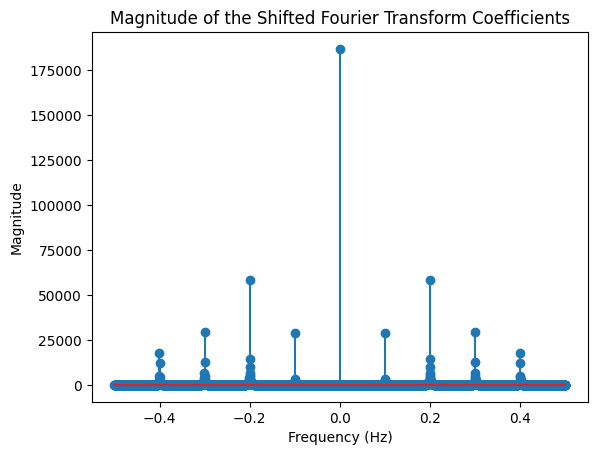

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of data points
data = r_list

# Convert the list to a NumPy array
data_array = np.array(data)

# Perform the Fast Fourier Transform (FFT)
fft_data = np.fft.fft(data_array)

# Compute the magnitude of the FFT coefficients
magnitude = np.abs(fft_data)

# Shift the FFT so that the 0 Hz frequency is in the middle of the plot
magnitude_shifted = np.fft.fftshift(magnitude)

# Compute the frequencies corresponding to the shifted FFT
freqs = np.fft.fftfreq(len(data_array))
shifted_freqs = np.fft.fftshift(freqs)

# Plot the magnitude of the shifted FFT coefficients
plt.stem(shifted_freqs, magnitude_shifted)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude of the Shifted Fourier Transform Coefficients')
plt.show()
